**Inspecting staellite images**
Extracted from https://www.kaggle.com/puneet6060/intel-image-classification
- The numbers of images has been reduced to roughly 1000 for each training set 

In [22]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [23]:
import os
import zipfile
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
local_zip = '/content/drive/MyDrive/intel_complete.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Define our example directories and files
base_dir = '/intel_complete'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')


In [25]:
# Directory with our training sea pictures
train_sea_dir = os.path.join(train_dir, 'sea')
validation_sea_dir = os.path.join(validation_dir, 'sea')

# Directory with our training forest pictures
train_forest_dir = os.path.join(train_dir, 'forest')
validation_forest_dir = os.path.join(validation_dir, 'forest')

# Directory with our training glacier pictures
train_glacier_dir = os.path.join(train_dir, 'glacier')
validation_glacier_dir = os.path.join(validation_dir, 'glacier')

# Directory with our training mountain pictures
train_mountain_dir = os.path.join(train_dir, 'mountain')
validation_mountain_dir = os.path.join(validation_dir, 'mountain')

# Directory with our training building pictures
train_buildings_dir = os.path.join(train_dir, 'buildings')
validation_buildings_dir = os.path.join(validation_dir, 'buildings')

# Directory with our training street pictures
train_street_dir = os.path.join(train_dir, 'street')
validation_street_dir = os.path.join(validation_dir, 'street')

In [26]:
train_sea_dir = os.listdir(train_sea_dir)
train_forest_dir = os.listdir(train_forest_dir)
train_glacier_dir = os.listdir(train_glacier_dir)
train_street_dir = os.listdir(train_street_dir)
train_buildings_dir = os.listdir(train_buildings_dir)
train_mountain_dir = os.listdir(train_mountain_dir)

validation_sea_dir = os.listdir(validation_sea_dir)
validation_forest_dir = os.listdir(validation_forest_dir)
validation_glacier_dir = os.listdir(validation_glacier_dir)
validation_mountain_dir = os.listdir(validation_mountain_dir)
validation_buildings_dir = os.listdir(validation_buildings_dir)
validation_street_dir = os.listdir(validation_street_dir)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [28]:


from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# TODO 2. Add a dropout layer with a dropout rate of 0.5
x = layers.Dropout(0.3, )(x)

# Create output layer with 3 nodes and softmax activation
output = layers.Dense(6, activation='softmax')(x)

model = Model(img_input, output)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [33]:
history = model.fit(
      train_generator,
      steps_per_epoch=200,
      validation_data = validation_generator,
      epochs=5,
      verbose=2)
model.summary()

Epoch 1/5
200/200 - 142s - loss: 0.9601 - acc: 0.6392 - val_loss: 0.8949 - val_acc: 0.6837
Epoch 2/5
200/200 - 143s - loss: 0.9368 - acc: 0.6530 - val_loss: 0.8467 - val_acc: 0.7093
Epoch 3/5
200/200 - 143s - loss: 0.9207 - acc: 0.6600 - val_loss: 0.7711 - val_acc: 0.7317
Epoch 4/5
200/200 - 142s - loss: 0.8824 - acc: 0.6877 - val_loss: 0.7762 - val_acc: 0.7250
Epoch 5/5
200/200 - 143s - loss: 0.9197 - acc: 0.6618 - val_loss: 1.0311 - val_acc: 0.6477
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
co

Text(0.5, 1.0, 'Training Loss')

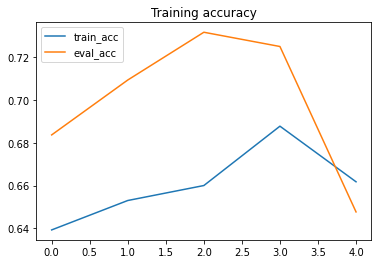

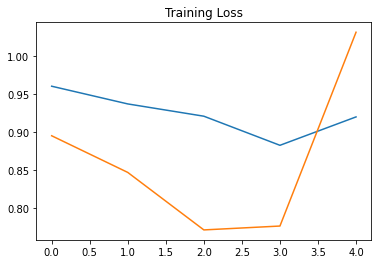

In [34]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = 'train_acc')
plt.plot(epochs, val_acc, label = 'eval_acc')
plt.title('Training accuracy')

plt.legend()
plt.figure()


# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training Loss')